## Meshgrid - Simulated Annealing

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random as random
import seaborn as sns
sns.set()

#### Example : Simulated annealing

$V(x) = V_{o}\left \lbrace nA + \sum_{i=1}^{n}[x_{i}^{2} - A \cos(6\pi x_{i})]\right \rbrace$

$n =2, A = 0.1, V_o = 1.0$

$Z =  0.2 + x^2 + y^2 -0.1 \cos(6 \pi x) - 0.1\cos(6 \pi y)$

In [16]:
# Design variables at mesh points
ns = 100
xs = np.arange(-1.0, 1.0, 1/ns)
ys = np.arange(-1.0, 1.0, 1/ns)

XG,YG = np.meshgrid(xs, ys) 


ZG =  0.2 + xs**2 + ys**2\
       - 0.5*np.cos(6.0*np.pi*XG)\
       - 0.5*np.cos(6.0*np.pi*YG)


#### 1. Heat Map

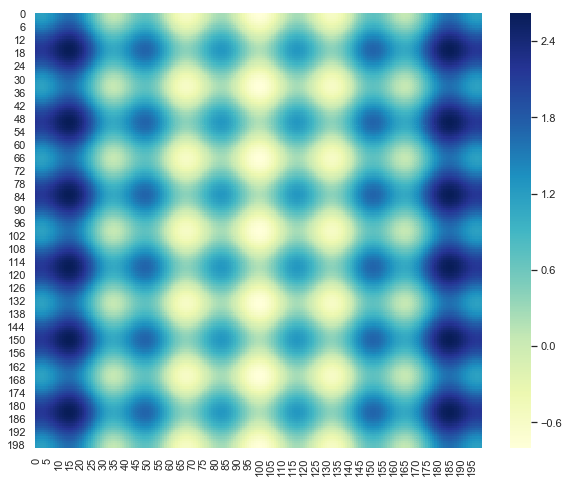

In [17]:
plt.figure(figsize = [10,8])
sns.heatmap(ZG, annot =False,cmap ="YlGnBu")

#### 2. Contour plot

Text(0, 0.5, 'x2')

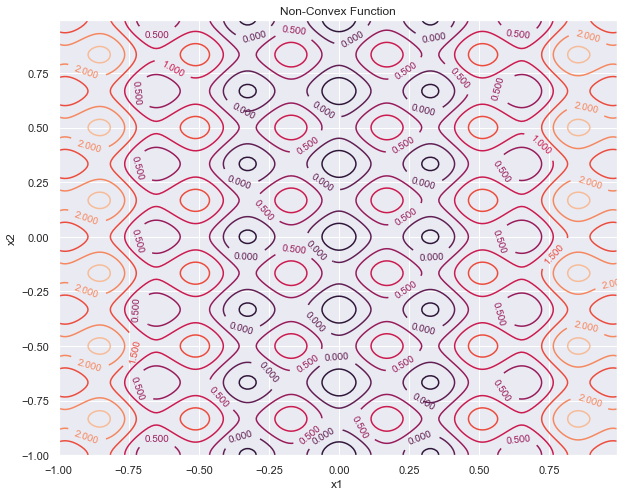

In [18]:
plt.figure(figsize =[10,8])

# Create a contour plot
CS = plt.contour(XG, YG, ZG)
plt.clabel(CS, inline=1, fontsize=10)


plt.title('Non-Convex Function')
plt.xlabel('x1')
plt.ylabel('x2')


#### 3. 3D plot

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

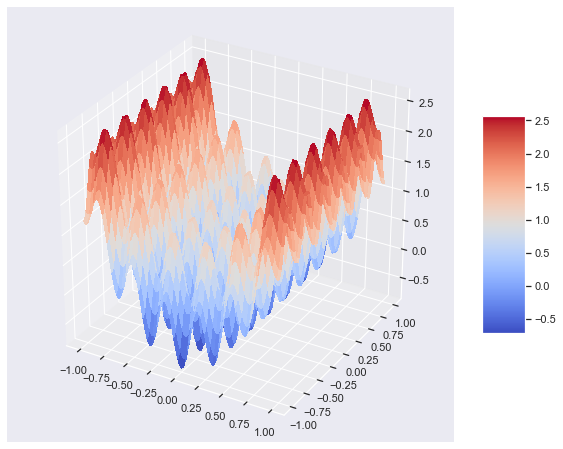

In [20]:
fig = plt.figure(figsize = [10,8])
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(XG, YG, ZG,\
                       cmap=cm.coolwarm,\
                       linewidth=0,\
                       antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Simulate the Annealing Process

In [30]:
def potential(x1,x2):
    obj = (2*10.0) + x1**2 + x2**2 - (10.0)*(np.cos(2.0*np.pi*x1) - np.cos(2.0*np.pi*x2))
    return obj

#### Setting up the parameters

In [78]:
# Start location
x_start = [0.5, -0.5]

#Number of particles
N = 2000
# Number of cycles
n = 2000
# Number of trials per cycle
m = 1000
# Number of accepted solutions
na = 0.0
# Probability of accepting worse solution at the start
p1 = 0.7
# Probability of accepting worse solution at the end
p50 = 0.001


# Initial temperature
t1 = -1.0/np.log(p1)
# Final temperature
t50 = -1.0/np.log(p50)
# Fractional reduction every cycle
frac = (t50/t1)**(1.0/(n-1.0))

# Initialize x, particle coordinates
x = np.zeros((n+1,2))
x[0] = x_start

# dynamic xi
xi = np.zeros(2)
xi = x_start
na = na + 1.0

# Current best results so far
xc = np.zeros(2)
xc = x[0]
fc = potential(xi[0],xi[1])
fs = np.zeros(n+1)
fs[0] = fc

# Current temperature
t = t1
# DeltaE Average
DeltaE_avg = 0.0

#### Performing Simulation

In [79]:
X0 = []
Y0 = []

In [80]:
for i in range(n):# number of cycle
    
    #print('Cycle: ' + str(i) + ' with Temperature: ' + str(t))
    
    for j in range(m):# number of trial
        
        
        # Generate new trial points
        xi[0] = xc[0] + random.random() - 0.5
        xi[1] = xc[1] + random.random() - 0.5
        
        # collect initial configuration
        if j == 0:
            X0.append(xi[0])
            Y0.append(xi[1])
        
        # Clip to upper and lower bounds
        xi[0] = max(min(xi[0],1.0),-1.0)
        xi[1] = max(min(xi[1],1.0),-1.0)
        
        DeltaE = abs(potential(xi[0],xi[1])-fc)
        
        #Metropolice step
        if (potential(xi[0],xi[1])>fc):
            # Initialize DeltaE_avg if a worse solution was found
            #   on the first iteration
            if (i==0 and j==0): DeltaE_avg = DeltaE
            # objective function is worse
            # generate probability of acceptance
            p = np.exp(-DeltaE/(DeltaE_avg * t))
            # determine whether to accept worse point
            if (random.random()<p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:
            # objective function is lower, automatically accept
            accept = True
            
            
        if (accept==True):
            # update currently accepted solution
            xc[0] = xi[0]
            xc[1] = xi[1]
            
            fc = potential(xc[0],xc[1])
            # increment number of accepted solutions
            na = na + 1.0
            
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na-1.0) +  DeltaE) / na
            
    # Record the final best x values at the end of every cycle
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    fs[i+1] = fc
    # Lower the temperature for next cycle
    t = frac * t

#### Result

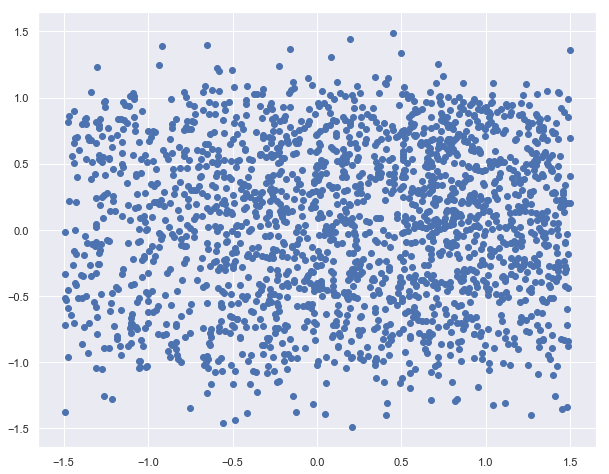

In [81]:
plt.figure(figsize=(10, 8))
plt.scatter(X0,Y0)
#plt.savefig('inital-config.png')
plt.show()

Best solution: [0.99151835 0.55916777]
Best objective: 1.9928084246547968


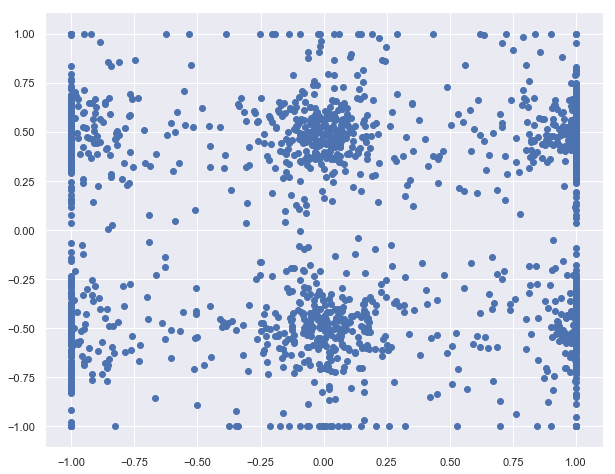

In [82]:
plt.figure(figsize=(10, 8))
plt.scatter(x[:,0],x[:,1])
#plt.savefig('final-config.png')
plt.show()

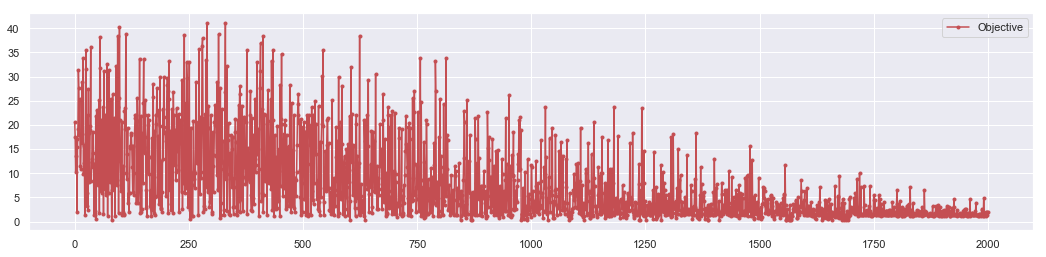

In [83]:
plt.figure(figsize=(18, 4))
plt.plot(fs,'r.-')
plt.legend(['Objective'])
#plt.savefig('iterations.png')
plt.show()

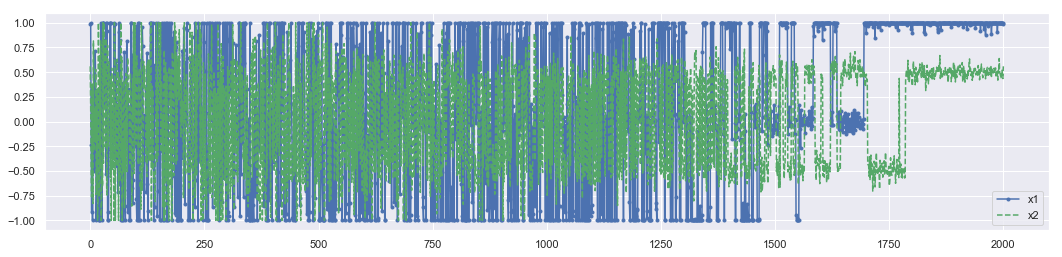

In [84]:
plt.figure(figsize=(18, 4))
plt.plot(x[:,0],'b.-')
plt.plot(x[:,1],'g--')
plt.legend(['x1','x2'])
#plt.savefig('iterations.png')
plt.show()

https://www.youtube.com/watch?v=wvJAgrUBF4w